In [6]:
import pandas as pd
df=pd.read_csv('Fin_Uci_thyroid1.csv')
df.head()

,age,TSH,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,...,T3 measured_t,TT4_measured_t,T4U_measured_t,FTI_measured_t,STMW,SVHC,SVHD,SVI,other,thyroid_class
0,23,4.10,2.0,102.0,0.97,108.0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
1,46,0.98,2.0,109.0,0.91,120.0,1,0,0,0,...,0,1,1,1,0,0,0,0,1,0
2,70,0.16,1.9,175.0,0.97,108.0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,70,0.72,1.2,61.0,0.87,70.0,0,0,0,0,...,1,1,1,1,0,0,0,1,0,0
4,18,0.03,2.0,183.0,1.30,141.0,0,1,0,0,...,0,1,1,1,0,0,0,0,1,0


In [8]:
df.shape

(6928, 32)

In [13]:
df['thyroid_class'].value_counts()

0    6581
1     220
2     127
Name: thyroid_class, dtype: int64

In [20]:
####independent and dependent features
X=df.drop("thyroid_class", axis=1)
y=df.thyroid_class

### Cross Validation Like KFOLD and Hyperparameter Tuning

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold,GridSearchCV
import numpy as np


In [21]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [22]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [24]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

/home/sourabh/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [25]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1955    2    9]
 [  10   58    0]
 [  35    1    9]]
0.9725829725829725
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1966
           1       0.95      0.85      0.90        68
           2       0.50      0.20      0.29        45

    accuracy                           0.97      2079
   macro avg       0.81      0.68      0.72      2079
weighted avg       0.97      0.97      0.97      2079



In [26]:
y_train.value_counts()

0    4615
1     152
2      82
Name: thyroid_class, dtype: int64

In [27]:
class_weight=dict({0:1,1:100})

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [29]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1946    0   20]
 [   5   63    0]
 [  31    0   14]]
0.9730639730639731
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1966
           1       1.00      0.93      0.96        68
           2       0.41      0.31      0.35        45

    accuracy                           0.97      2079
   macro avg       0.80      0.74      0.77      2079
weighted avg       0.97      0.97      0.97      2079



### SMOTE Oversampling

In [4]:
import imblearn

In [5]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [10]:
df=read_csv('Fin_Uci_thyroid1.csv')

Class=0, n=6581 (94.991%)
Class=2, n=127 (1.833%)
Class=1, n=220 (3.176%)


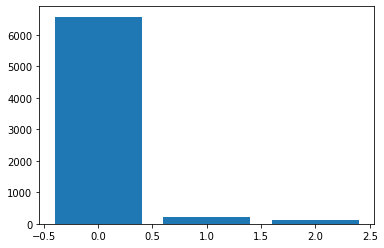

In [11]:
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=6581 (33.333%)
Class=2, n=6581 (33.333%)
Class=1, n=6581 (33.333%)


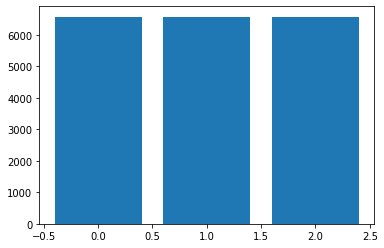

In [15]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()